### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [5]:
import tensorflow as tf
tf.set_random_seed(42)

In [6]:
tf.__version__

'1.13.1'

### Collect Data

In [1]:
import keras

Using TensorFlow backend.


In [59]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [3]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [60]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [8]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

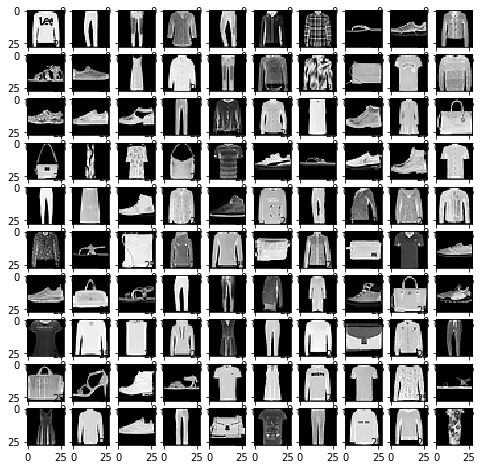

In [9]:
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = testX[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [10]:
trainX.shape

(60000, 28, 28)

In [11]:
testX.shape

(10000, 28, 28)

In [12]:
trainX = trainX.reshape(60000, 784)

testX = testX.reshape(10000, 784)


In [13]:
testX.shape

(10000, 784)

In [14]:
trainY.shape

(60000, 10)

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [29]:
#Initialize Sequential Graph (model)
model = tf.keras.models.Sequential()

#Normalize input data
model.add(tf.keras.layers.BatchNormalization(input_shape=(784,)))

#Add Dense layer for prediction - Keras declares weights and bias automatically
model.add(tf.keras.layers.Dense(1))

#Compile the model - add Loss and Gradient Descent optimizer
model.compile(optimizer='sgd', loss='mse')

### Execute the model using model.fit()

In [30]:
model.fit(trainX, trainY)

60000/60000 [==============================] - 4s 64us/sample - loss: 10.4347


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [31]:
model.add(tf.keras.layers.BatchNormalization(input_shape=(784,)))

### Execute the model

In [32]:
model.fit(trainX, trainY)

60000/60000 [==============================] - 5s 82us/sample - loss: 0.1036


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [34]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Compile the model
model.compile(optimizer=sgd_optimizer,loss=losses.mean_squared_error, metrics=['accuracy'])

In [35]:
model.fit(trainX, trainY)

60000/60000 [==============================] - 4s 72us/sample - loss: 0.0900 - acc: 0.9000


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [49]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())

In [50]:
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [51]:
#Add 2nd hidden layer
model2.add(tf.keras.layers.Dense(100, activation='sigmoid'))

In [52]:
#Add OUTPUT layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [54]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Compile the model
model2.compile(optimizer=sgd_optimizer, loss=losses.mean_squared_error, metrics=['accuracy'])

## Review model

In [56]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_v1_6 (Ba (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [61]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=100,
          batch_size=1000)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0930 - acc: 0.0956 - val_loss: 0.0930 - val_acc: 0.0899
Epoch 2/100
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0924 - acc: 0.0909 - val_loss: 0.0923 - val_acc: 0.0867
Epoch 3/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0919 - acc: 0.0890 - val_loss: 0.0918 - val_acc: 0.0881
Epoch 4/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0916 - acc: 0.0925 - val_loss: 0.0914 - val_acc: 0.0951
Epoch 5/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0913 - acc: 0.0993 - val_loss: 0.0911 - val_acc: 0.1044
Epoch 6/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0910 - acc: 0.1065 - val_loss: 0.0909 - val_acc: 0.1122
Epoch 7/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0908 - acc: 0.1150 - val_l

Epoch 59/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0851 - acc: 0.3956 - val_loss: 0.0851 - val_acc: 0.3921
Epoch 60/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0850 - acc: 0.3961 - val_loss: 0.0850 - val_acc: 0.3937
Epoch 61/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0849 - acc: 0.3991 - val_loss: 0.0848 - val_acc: 0.3958
Epoch 62/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0848 - acc: 0.4002 - val_loss: 0.0847 - val_acc: 0.3986
Epoch 63/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0847 - acc: 0.4020 - val_loss: 0.0846 - val_acc: 0.4008
Epoch 64/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0846 - acc: 0.4036 - val_loss: 0.0845 - val_acc: 0.4025
Epoch 65/100
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0845 - acc: 0.4046 - val_loss: 0.0844 - val_acc: 0.4038
Epoch 66/100
